In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('brest.csv') #loading the dataset
data.info() # this gives the information about the columns present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [10]:

data.columns # check the colums

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [0]:
data.drop('id',axis=1,inplace=True) # drop unncessary columns

In [0]:
data.drop('Unnamed: 32',axis=1,inplace=True) # drop unecessary columns

In [13]:
data.columns #check if columns are dropped

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [0]:
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0}) #conver the text label to number values malginant=1 and bening =0

In [0]:
data = shuffle(data) # shuffling is done to incorporate randomness

In [16]:
data.head() #check if the data is shuffled

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
424,0,9.742,19.12,61.93,289.7,0.10750,0.08333,0.008934,0.01967,0.2538,...,11.21,23.17,71.79,380.9,0.1398,0.13520,0.02085,0.04589,0.3196,0.08009
69,0,12.780,16.49,81.37,502.5,0.09831,0.05234,0.036530,0.02864,0.1590,...,13.46,19.76,85.67,554.9,0.1296,0.07061,0.10390,0.05882,0.2383,0.06410
534,0,10.960,17.62,70.79,365.6,0.09687,0.09752,0.052630,0.02788,0.1619,...,11.62,26.51,76.43,407.5,0.1428,0.25100,0.21230,0.09861,0.2289,0.08278
148,0,14.440,15.18,93.97,640.1,0.09970,0.10210,0.084870,0.05532,0.1724,...,15.85,19.85,108.60,766.9,0.1316,0.27350,0.31030,0.15990,0.2691,0.07683
220,0,13.650,13.16,87.88,568.9,0.09646,0.08711,0.038880,0.02563,0.1360,...,15.34,16.35,99.71,706.2,0.1311,0.24740,0.17590,0.08056,0.2380,0.08718


In [17]:
important_features = list((data.columns[1:11]))
important_features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

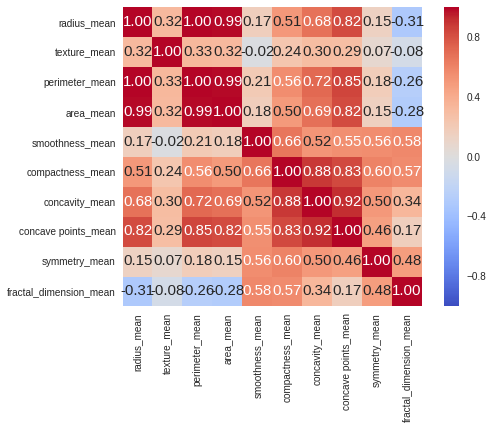

In [18]:
corr = data[important_features].corr()
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= important_features, yticklabels= important_features,
           cmap= 'coolwarm') 

In [0]:
#we select the following features based on the correlation map above
var2 = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean','diagnosis'] 

In [0]:
data= data[var2] # we recreate data witht the necessary features and labels

In [21]:
data

,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,symmetry_mean,diagnosis
424,19.12,61.93,0.10750,0.08333,0.2538,0
69,16.49,81.37,0.09831,0.05234,0.1590,0
534,17.62,70.79,0.09687,0.09752,0.1619,0
148,15.18,93.97,0.09970,0.10210,0.1724,0
220,13.16,87.88,0.09646,0.08711,0.1360,0
283,18.77,108.80,0.10660,0.18020,0.1876,1
18,22.15,130.00,0.09831,0.10270,0.1582,1
461,26.27,186.90,0.10840,0.19880,0.2061,1
398,14.83,70.31,0.07741,0.04768,0.1535,0
172,11.89,102.50,0.12570,0.15550,0.1966,1


In [22]:
scaler = MinMaxScaler() # here we scale the X using minmax scaler for better performance
x= scaler.fit_transform(data.iloc[:,0:5])
data.iloc[:,0:5] = x[:,0:5] #we add the scaled X back to the data
data

,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,symmetry_mean,diagnosis
424,0.318228,0.125354,0.495351,0.196154,0.746465,0
69,0.229286,0.259692,0.412386,0.101098,0.267677,0
534,0.267501,0.186580,0.399386,0.239679,0.282323,0
148,0.184985,0.346762,0.424935,0.253727,0.335354,0
220,0.116672,0.304678,0.395685,0.207748,0.151515,0
283,0.306392,0.449243,0.487226,0.493283,0.412121,1
18,0.420697,0.595743,0.412386,0.255567,0.263636,1
461,0.560027,0.988943,0.503476,0.550334,0.505556,1
398,0.173148,0.183263,0.223707,0.086804,0.239899,0
172,0.073723,0.405708,0.659655,0.417520,0.457576,1


In [23]:
ones = np.ones(data.shape[0]) # here we create an array of ones for the intercept term
data = np.column_stack((ones,data)) # this column of ones is added to the data
data

array([[1.        , 0.31822793, 0.12535416, ..., 0.19615361, 0.74646465,
        0.        ],
       [1.        , 0.22928644, 0.2596918 , ..., 0.10109809, 0.26767677,
        0.        ],
       [1.        , 0.26750085, 0.18658006, ..., 0.23967855, 0.28232323,
        0.        ],
       ...,
       [1.        , 0.34223876, 0.74846244, ..., 0.3316361 , 0.22474747,
        1.        ],
       [1.        , 0.17720663, 0.23840785, ..., 0.08076192, 0.25808081,
        0.        ],
       [1.        , 0.58674332, 0.61578329, ..., 0.27427765, 0.38080808,
        1.        ]])

In [24]:
data.shape

(569, 7)

In [25]:
theta = np.zeros(data.shape[1]-1) #here we initialize the theta parameters with zeros, this will be used later for prediction
theta.shape

(6,)

In [26]:
X = data[:,0:6] #here we seperate out X from the dataset
X

array([[1.        , 0.31822793, 0.12535416, 0.49535073, 0.19615361,
        0.74646465],
       [1.        , 0.22928644, 0.2596918 , 0.41238603, 0.10109809,
        0.26767677],
       [1.        , 0.26750085, 0.18658006, 0.39938612, 0.23967855,
        0.28232323],
       ...,
       [1.        , 0.34223876, 0.74846244, 0.3682405 , 0.3316361 ,
        0.22474747],
       [1.        , 0.17720663, 0.23840785, 0.30865758, 0.08076192,
        0.25808081],
       [1.        , 0.58674332, 0.61578329, 0.42764286, 0.27427765,
        0.38080808]])

In [0]:
class normal_gradient_descent(object): #here we create a class which has all the types of gradientdescent algos
  def sigmoid(self,theta,x):
    return 1.0/(1+np.exp(-np.dot(x,theta))) # thiss reutrn the value of the sigmoid function of X, theta
  def cost(self,theta,X,y):
    first = np.multiply(-y,np.log(self.sigmoid(theta,X)))
    second = np.multiply((1-y),np.log(1-self.sigmoid(theta,X)))
    summ = np.sum(first-second)
    return (summ/X.shape[0])
  def grad(self,theta,X,y,lr=0.0001,iterations=50000):
    ct=[]
    c = self.cost(theta,X,y)
    for i in range(iterations):
      ct = self.cost(theta,X,y)
      theta = theta - lr*np.dot(X.T,(self.sigmoid(theta,X)-y)) #here we calculate the value of theta for entire dataset
    return theta,ct
  def s_grad(self,s_theta,X,y,lr=0.0001,iterations=5000):
    s_ct=[]
    shuffle(X,y)
    s_c = self.cost(s_theta,X,y)
    for i in range(iterations):
      for j in range(X.shape[0]):
        s_ct = self.cost(s_theta,X[j],y[j])
        s_theta = s_theta - lr*np.dot(X[j].T,(self.sigmoid(s_theta,X[j])-y[j])) #here it for single example
    return s_theta,s_ct
  def batch_g(self,m_theta,X,y,lr=0.001,iterations=5000,batch_size=100):
    initial = 0
    for i in range(iterations):
      for j in range(0,X.shape[0],batch_size): #here we do batches of 100 ,the for loop autmoatically gets the batches
        m_theta = m_theta - lr*np.dot(X[j:j+batch_size,:].T,(self.sigmoid(m_theta,X[j:j+batch_size,:])-y[j:j+batch_size:,]))
    return m_theta
      
    
  def pred_values(self,theta,X):
    pred_prob = self.sigmoid(theta,X)
    pred_value = np.where(pred_prob>=.5,1,0) #this function is used to calculate the predicted values
    return pred_value

  

In [28]:
data[:,0:6].shape[0]

569

In [29]:
data_train = data[0:350,:]
data_train.shape
data_test = data[350:,:]
data_test.shape
data_train[:,0:6]

array([[1.        , 0.31822793, 0.12535416, 0.49535073, 0.19615361,
        0.74646465],
       [1.        , 0.22928644, 0.2596918 , 0.41238603, 0.10109809,
        0.26767677],
       [1.        , 0.26750085, 0.18658006, 0.39938612, 0.23967855,
        0.28232323],
       ...,
       [1.        , 0.20696652, 0.08326999, 0.56305859, 0.19210478,
        0.29747475],
       [1.        , 0.18058843, 0.49208762, 0.41383046, 0.295442  ,
        0.34292929],
       [1.        , 0.26817721, 0.30384908, 0.42312901, 0.18462058,
        0.33939394]])

In [30]:
data_test.shape

(219, 7)

In [0]:
instance = normal_gradient_descent() #create a object of the class gradient descent

In [0]:
# here we do normal gradient descent which takes all the input at once
normal_theta,normal_cost = instance.grad(theta,data_train[:,0:6],data_train[:,-1]) 

In [0]:
#here we do stochastic gradient descent which takes one example at a time , so can converge faster in lesser steps
sgd_theta,sgd_cost= instance.s_grad(theta,data_train[:,0:6],data_train[:,-1],0.01,5000) 

In [0]:
#the tradeoff between the above two, here we do it in batches of 10
mini_theta = instance.batch_g(theta,data_train[:,0:6],data_train[:,-1],0.01,500000,15)

In [35]:
print (mini_theta) #print the values of theta of mini_batch

[-19.81401481  10.93719438  28.64048809  11.30793534   1.86817197
   2.07057726]


In [36]:
print(normal_theta) #her we print the values of the normal gradient descent

[-10.63201008   6.14300367  14.7329138    2.36633833   5.83522903
   1.42965984]


In [37]:
print(sgd_theta) #here we print the values of stocahstic gradient

[-18.20104203  10.1042313   26.19802469   9.51878179   2.60530732
   2.1577683 ]


In [0]:
y_pred_sgd = instance.pred_values(sgd_theta,data_test[:,0:6]) #here we predict the values using stochastic parameters

In [0]:
y_pred_grad = instance.pred_values(normal_theta,data_test[:,0:6]) #here we preict using normal grad descent parameters

In [0]:
y_pred_minib = instance.pred_values(mini_theta,data_test[:,0:6]) #here we predict using mini batch parameter

In [41]:
np.sum(y_pred_minib == data_test[:,-1]) #check how many we got right out of 219 points for minbatch algorithm

202

In [42]:
np.sum(y_pred_grad == data_test[:,-1]) #the number we got right using normal gradient descent

200

In [43]:
np.sum(y_pred_sgd == data_test[:,-1]) #the number we got right using stochastic gradient descent

202

In [0]:
def fold_i_y(data,i,k):
  n = len(data)
  return len(data[n*(i-1)//k:n*i//k])

In [0]:
c_v = normal_gradient_descent()

In [76]:
cross_para_normal_Grad =[]
cross_para_stochastic_grad=[]
cross_para_mini_batch =[]
fold_i = 1
fold_k = 5
counter = 1
s = 0
total_ac = 0
while counter!= fold_k+1:
  print("fold",counter)
  fold = fold_i_y(data_train,counter,5)
  d_fold = data[s:s+fold]
  d_test = d_fold
  X_t = d_test[:,0:6]
  y_t = d_test[:,-1]
  print(X_t.shape,y_t.shape,theta.shape)
  par,_ = c_v.grad(theta,X_t,y_t,0.001,1000)
  print("Normalgradient",par)
  parr,_ = c_v.s_grad(theta,X_t,y_t,0.01,10000)
  print("Stochastic_gradient",parr)
  parrr= c_v.batch_g(theta,X_t,y_t,0.01,10000,25)
  print("batch_gradinet",parrr)
  cross_para_normal_Grad.append(par)
  cross_para_stochastic_grad.append(parr)
  cross_para_mini_batch.append(parrr)
  s = s+ fold
  counter = counter+1

fold 1
(70, 6) (70,) (6,)
Normalgradient [-2.42567696  1.17315234  2.60208662  0.27561906  2.0965857   0.36405032]
Stochastic_gradient [-19.38796472   8.94141495  24.52533594   0.94324368  17.26792792
   5.55603169]
batch_gradinet [-19.38574742   8.95415546  24.52512352   0.91927183  17.28652747
   5.56217893]
fold 2
(70, 6) (70,) (6,)
Normalgradient [-1.97232734  1.30048196  2.8984541   0.06419819  1.6360631   0.11822505]
Stochastic_gradient [-12.16748094   9.3380434   21.90896531   6.00091679   0.26573563
  -1.48001769]
batch_gradinet [-12.16318514   9.33037323  21.90796743   5.99734968   0.2633893
  -1.47020714]
fold 3
(70, 6) (70,) (6,)
Normalgradient [-2.12554067e+00  5.46350803e-01  2.60730495e+00 -5.21680264e-04
  1.16880247e+00  4.99460536e-01]
Stochastic_gradient [-16.19917708   8.28262061  24.85208474   6.88953086  -5.26197181
   8.4799912 ]
batch_gradinet [-16.20135832   8.30600337  24.82839961   6.88373235  -5.26551653
   8.49774383]
fold 4
(70, 6) (70,) (6,)
Normalgradient

In [0]:
def score(y_pred,y_test):
  t_p =0 
  f_p =0
  t_n =0
  f_n =0
  for i in range(len(y_test)):
    if y_test[i] and y_pred[i]==1:
      t_p +=1
    if y_pred[i] == 1 and y_test[i]==0:
      f_p+=1
    if y_test[i]and y_pred[i] ==0:
      t_n+=1 
    if (y_pred[i] == 0 and y_test[i]==1):
      f_n+=1
   
  precision = t_p/(t_p + f_p)
  recall = t_p/(t_p + f_n)
  accuracy = (t_p+ t_n)/(t_p+t_n+f_p+f_n)
  return precision,recall,accuracy

In [0]:
best_theta_normal_grad = np.mean(cross_para_normal_Grad,axis=0)

In [0]:
best_theta_stochastic_grad = np.mean(cross_para_stochastic_grad,axis=0)

In [0]:
best_theta_mini = np.mean(cross_para_mini_batch,axis =0)

In [81]:
print(best_theta_normal_grad)

[-2.27807149  0.96775087  2.60251035  0.22028982  1.83249303  0.3313417 ]


In [82]:
print(best_theta_stochastic_grad)

[-17.5681444    9.65880307  23.8030332    5.46423991   7.97216312
   3.55628421]


In [83]:
print(best_theta_mini)

[-17.56793125   9.66589776  23.79740013   5.46030306   7.98107012
   3.55734056]


In [0]:
 #here we predict the values using stochastic parameters cross validation
y_pred_sgd_cv = c_v.pred_values(best_theta_stochastic_grad,data_test[:,0:6])


In [0]:
#here we preict using normal grad descent parameters cross validation
y_pred_grad_cv = c_v.pred_values(best_theta_normal_grad,data_test[:,0:6]) 

In [0]:
y_pred_minib_cv = c_v.pred_values(best_theta_mini,data_test[:,0:6]) #here we predict using mini batch parameter cross validation

In [87]:
test = data_test[:,-1]
test

array([0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1.])

In [88]:
p,r,a=score(y_pred_grad_cv,test)
print("Precision, Recall,Accuracy for Normal Gradient are\n")
print('\n',p,r,a)

Precision, Recall,Accuracy for Normal Gradient are


 0.9583333333333334 0.6216216216216216 0.7115384615384616


In [89]:
p_1,r_1,a_1 = score(y_pred_sgd_cv,test)
print("Precision, Recall,Accuracy for stochastic Gradient are\n")
print('\n',p_1,r_1,a_1)

Precision, Recall,Accuracy for stochastic Gradient are


 0.8904109589041096 0.8783783783783784 0.8131868131868132


In [90]:
p_2,r_2,a_2 = score(y_pred_sgd_cv,test)
print("Precision, Recall,Accuracy for batch Gradient are\n")
print('\n',p_2,r_2,a_2)

Precision, Recall,Accuracy for batch Gradient are


 0.8904109589041096 0.8783783783783784 0.8131868131868132


In [92]:
np.sum(y_pred_minib_cv == data_test[:,-1]) #check how many we got right out of 219 points for minbatch algorithm with Cross val

202

In [93]:
np.sum(y_pred_sgd_cv == data_test[:,-1]) #check how many we got right out of 219 points for stochastic algorithm with cross val

202

In [94]:
np.sum(y_pred_grad_cv == data_test[:,-1]) #check how many we got right out of 219 points for normal grad algorithm with cross val

189